In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import torch                      # Libraries from Pytorch

import torch.nn as nn

import torch.nn.functional as F

df=pd.read_csv('D:\\Academics\\Major Project\\data\\diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Data Cleaning is performed to replace 0 values with statistical measures

filt=(df['Outcome']==0) & (df['Insulin']!=0)

ins_med_0=df.loc[filt].median()

df.loc[((df.Insulin==0) & (df.Outcome==0)) ,'Insulin']=130.2


filt=(df['Outcome']==1) & (df['Insulin']!=0)

ins_med_1=df.loc[filt].median()

df.loc[((df.Insulin==0) & (df.Outcome==1)) ,'Insulin']=206.8


filt=(df['Outcome']==0) & (df['Glucose']!=0)

glu_med_0=df.loc[filt].mean()

df.loc[((df.Glucose==0) & (df.Outcome==0)) ,'Glucose']=110.0

filt=(df['Outcome']==1) & (df['Glucose']!=0)

glu_med_1=df.loc[filt].mean()

df.loc[((df.Glucose==0) & (df.Outcome==1)) ,'Glucose']=142.3


filt=(df['Outcome']==0) & (df['SkinThickness']!=0)

sk_med_0=df.loc[filt].mean()

df.loc[((df.SkinThickness==0) & (df.Outcome==0)) ,'SkinThickness']=27.0

filt=(df['Outcome']==1) & (df['SkinThickness']!=0)

sk_med_1=df.loc[filt].mean()

df.loc[((df.SkinThickness==0) & (df.Outcome==1)) ,'SkinThickness']=33.0

filt=(df['Outcome']==0) & (df['BloodPressure']!=0)

bp_med_0=df.loc[filt].mean()

df.loc[((df.BloodPressure==0) & (df.Outcome==0)) ,'BloodPressure']=70.0

filt=(df['Outcome']==1) & (df['BloodPressure']!=0)

bp_med_1=df.loc[filt].mean()

df.loc[((df.BloodPressure==0) & (df.Outcome==1)) ,'BloodPressure']=74.5


In [3]:
Q1 = np.percentile(df['Insulin'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(df['Insulin'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

print("IQR : ",IQR)

upper = np.where(df['Insulin'] >= (Q3+1.5*IQR))

lower = np.where(df['Insulin'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)

df.drop(lower[0], inplace = True)



IQR :  85.80000000000001


In [4]:
df1 = df.append(df, ignore_index=True)

In [5]:
X=df1.drop('Outcome',axis=1).values
# Independent features

y=df1['Outcome'].values
z=df1['Outcome'].values 
#  Dependent features

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
# Creating Tensors

X_train=torch.FloatTensor(X_train)

X_test=torch.FloatTensor(X_test)

y_train=torch.LongTensor(y_train)

y_test=torch.LongTensor(y_test)

In [8]:
# ANN Model creation using Pytorch

class ANN_Model(nn.Module):
    
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        
        super().__init__()
        
        self.f_connected1=nn.Linear(input_features,hidden1)
        
        self.f_connected2=nn.Linear(hidden1,hidden2)
        
        self.out=nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        
        x=F.relu(self.f_connected1(x))
        
        x=F.relu(self.f_connected2(x))
        
        x=self.out(x)
        
        return x

In [9]:
# Instantiation of ANN Model

torch.manual_seed(20) 

# Sets the seed for generating random numbers. Returns a torch.Generator object.

model=ANN_Model()

In [10]:
model.parameters 

# Listing out the parameters in our model

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [11]:
df.corr()              

# Co-relation of attributes is observed here

# Feature Significance ... as we observe all features are necessary for prediction


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149243,0.214480,0.100303,0.177655,0.025047,-0.035167,0.543591,0.227399
Glucose,0.149243,1.000000,0.250534,0.224256,0.492494,0.229458,0.116333,0.281678,0.499351
BloodPressure,0.214480,0.250534,1.000000,0.198943,0.176725,0.239658,0.003443,0.337329,0.183760
SkinThickness,0.100303,0.224256,0.198943,1.000000,0.231907,0.500908,0.086265,0.139758,0.313537
Insulin,0.177655,0.492494,0.176725,0.231907,1.000000,0.223939,0.082843,0.229440,0.534620
BMI,0.025047,0.229458,0.239658,0.500908,0.223939,1.000000,0.140962,0.045299,0.299064
DiabetesPedigreeFunction,-0.035167,0.116333,0.003443,0.086265,0.082843,0.140962,1.000000,0.044233,0.183548
Age,0.543591,0.281678,0.337329,0.139758,0.229440,0.045299,0.044233,1.000000,0.232272
Outcome,0.227399,0.499351,0.183760,0.313537,0.534620,0.299064,0.183548,0.232272,1.000000


<AxesSubplot:>

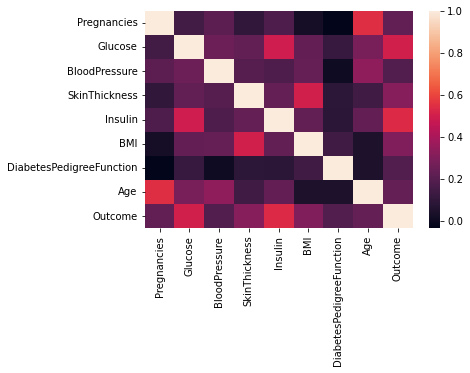

In [12]:
# Digrammatic  representation - correlation of parameters

sns.heatmap(df.corr())

In [13]:
# Backward propagation ... loss_function and optimizer are defined

loss_function=nn.CrossEntropyLoss()     #Cross-entropy is commonly used in machine learning as a loss function.

# torch.optim is a package implementing various optimization algorithms

optimizer=torch.optim.Adam(model.parameters(),lr=0.02)  # 'lr' denotes learning rate

In [14]:
# Epochs are number of times that learning algorithm will work through entire training dataset

epochs=500

final_losses=[]

for i in range(epochs):
    
    i=i+1
    
    y_pred=model.forward(X_train)
    
    loss=loss_function(y_pred,y_train)
    
    final_losses.append(loss)
    
    if i%100==1:
        
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
        
    optimizer.zero_grad()
    
    # Sets the gradients of all optimized torch
    
    loss.backward()
    
    # compute gradient of loss w.r.t all parameters in loss that have requires_grad = True &
    
    # store them in parameter
    
    optimizer.step()
    
    # Makes the optimizer iterate over all parameters (tensors) it is supposed to update &
    
    # Use their internally stored grad to update values

Epoch number: 1 and the loss : 2.6238677501678467
Epoch number: 101 and the loss : 0.45009782910346985
Epoch number: 201 and the loss : 0.3828475773334503
Epoch number: 301 and the loss : 0.33732980489730835
Epoch number: 401 and the loss : 0.3064268231391907


In [15]:
# Prediction performed in X_test data

predictions=[]

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        
        y_pred=model(data)
        
        predictions.append(y_pred.argmax().item())


In [16]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predictions)

# CM is also called as Error Matrix, which is summarised table to assess the performance of classification model

print(cm)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

#   [[TP FP]
#    [FN TN]] reprsents confusion matrix

[[178  22]
 [ 19  78]]


Text(69.0, 0.5, 'Predicted Values')

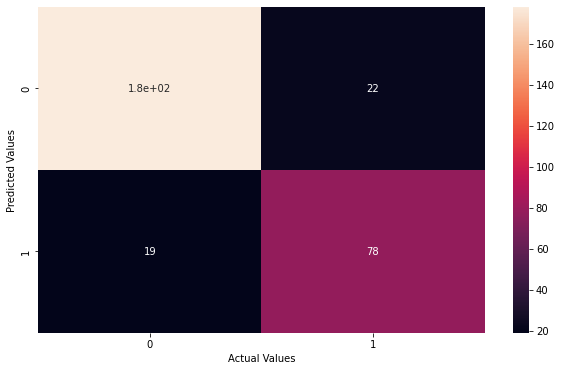

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.heatmap(cm,annot=True)

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

In [19]:
# Determining Accuracy using pre-defined function from scikit learn module

from sklearn.metrics import accuracy_score

score=accuracy_score(y_test,predictions)

round(score * 100, 2)

86.2

<AxesSubplot:xlabel='Insulin'>

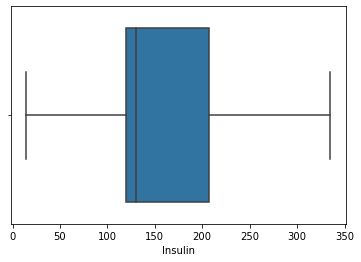

In [20]:
sns.boxplot(x=df['Insulin'])

# Boxplot to detect outliers

# Boxplot summarizes sample data using 25th, 50th, and 75th percentiles

In [21]:
# Z-Score (a numerical measurement that describes a value's relationship to the mean of a group of values)

# It gives relative score between records in dataset & also referred as standard score

from scipy import stats

import numpy as np
 
z = np.abs(stats.zscore(df['Pregnancies'])) # Zscore = (data_point - mean) / std. deviation

print(z)

0      0.634056
1      0.844478
2      1.225470
3      0.844478
4      1.140185
         ...   
763    1.816884
764    0.548771
765    0.338349
766    0.844478
767    0.844478
Name: Pregnancies, Length: 742, dtype: float64


In [22]:
# Saving our model to local disk

model_scripted = torch.jit.script(model)

model_scripted.save('model_scripted.pt')

In [23]:
# Loading & Verifying attributes of model

# Used to Load a ScriptModule or ScriptFunction previously saved with torch.jit.save

model = torch.jit.load('model_scripted.pt') 

model.eval()

RecursiveScriptModule(
  original_name=ANN_Model
  (f_connected1): RecursiveScriptModule(original_name=Linear)
  (f_connected2): RecursiveScriptModule(original_name=Linear)
  (out): RecursiveScriptModule(original_name=Linear)
)

In [24]:
# List of attribute values [ Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age ]

lst1=[4, 98.0, 89.0, 89.0, 879.0, 9843.1, 3.288, 53.0]

In [25]:
# Prediction for random data

new_data=torch.tensor(lst1)

In [26]:
# torch.no_grad() is used to perform inference without Gradient Calculation.
# Also to make sure there's no leak test data into the model.

with torch.no_grad():
    if (model(new_data).argmax().item()):
        print("Diabetic (Positive)")
    else:
        print("Non-Diabetic (Negative)")

Diabetic (Positive)


In [27]:
# Cleaned dataset is saved as .csv file in local disk

df.to_csv('data_cleaned.csv')

In [28]:
false_positive_rate = FP/(FP+TN)
true_positive_rate = TP/(TP+FN)
#print(false_positive_rate)
#print(true_positive_rate)


AUC score is  0.8470618556701032


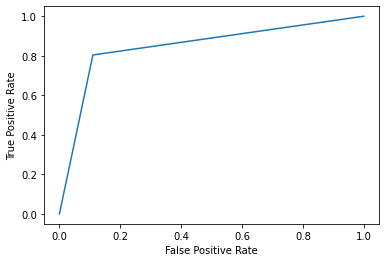

In [40]:
import numpy as np
 
from sklearn.metrics import roc_auc_score

from sklearn import metrics

import matplotlib.pyplot as plt

 
auc = roc_auc_score(y_test,predictions)
 
print("AUC score is ",auc)

fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()